In [17]:
import os 
import pickle
import numpy as np

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load CIFAR-10 dataset

In [20]:
# Initialize variables
X_train, y_train = [], []
X_test, y_test = [], []

# Load all the paths of the pickle files
cifar_path = "CIFAR-10"
files_path = os.listdir(cifar_path)

# Load training data
for file in files_path: 
  filepath = os.path.join(cifar_path, file)
  if file.startswith("data_batch"):
    temp_dict = unpickle(filepath)
    X_train.extend(temp_dict[b'data'])
    y_train.extend(temp_dict[b'labels'])
    print(len(X_train), len(y_train))

# Load testing data
for file in files_path:
    filepath = os.path.join(cifar_path, file)
    if file.startswith("test_batch"):
        temp_dict = unpickle(filepath)
        X_test.append(temp_dict[b'data'])
        y_test.extend(temp_dict[b'labels'])

# Turn into numpy array 
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the data
X_train = np.vstack(X_train).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X_test = np.vstack(X_test).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(X_train.shape, y_train.shape)

10000 10000
20000 20000
30000 30000
40000 40000
50000 50000
(50000, 32, 32, 3) (50000,)


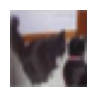

In [26]:
import matplotlib.pyplot as plt

# Select an image index (e.g., 0)
index = 34000

# Get the image
image = X_train[index]

# Plot the image
plt.figure(figsize=(1, 1))  
plt.imshow(image)
plt.axis("off")  # Hide axes for better visualization
plt.show()
